# Pandas Practice

This notebook is dedicated to practicing different tasks with pandas. The solutions are available in a solutions notebook, however, you should always try to figure them out yourself first.

It should be noted there may be more than one different way to answer a question or complete an exercise.

Exercises are based off (and directly taken from) the quick introduction to pandas notebook.

Different tasks will be detailed by comments or text.

For further reference and resources, it's advised to check out the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/).

In [1]:
# Import pandas
import pandas as pd

In [3]:
# Create a series of three different colours
series_three_colours = pd.Series(['red', 'green', 'blue'])

0      red
1    green
2     blue
dtype: object

In [4]:
# View the series of different colours
series_three_colours

0      red
1    green
2     blue
dtype: object

In [6]:
# Create a series of three different car types and view it
series_three_car_types = pd.Series(['sedan', 'hatchback', 'SUV'])

In [7]:
# Combine the Series of cars and colours into a DataFrame
car_df = pd.DataFrame({'cars': series_three_car_types, 'colours': series_three_colours})
car_df

,cars,colours
0,sedan,red
1,hatchback,green
2,SUV,blue


In [11]:
# Import "car-sales.csv" and turn it into a DataFrame
car_sales = pd.read_csv('car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


**Note:** Since you've imported `../data/car-sales.csv` as a DataFrame, we'll now refer to this DataFrame as 'the car sales DataFrame'.

In [12]:
# Export the DataFrame you created to a .csv file
car_sales.to_csv('exported-car-sales.csv', index=False)

In [14]:
# Find the different datatypes of the car data DataFrame
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [15]:
# Describe your current car sales DataFrame using describe()
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [16]:
# Get information about your DataFrame using info()
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


What does it show you?

In [17]:
# Create a Series of different numbers and find the mean of them
series_number = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
series_number.mean()

np.float64(5.5)

In [18]:
# Create a Series of different numbers and find the sum of them
series_number.sum()

np.int64(55)

In [19]:
# List out all the column names of the car sales DataFrame
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [20]:
# Find the length of the car sales DataFrame
len(car_sales)

10

In [15]:
# Show the first 5 rows of the car sales DataFrame
car_sales.head()

In [21]:
# Show the first 7 rows of the car sales DataFrame
car_sales.head(7)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"


In [17]:
# Show the bottom 5 rows of the car sales DataFrame
car_sales.tail()

In [22]:
# Use .loc to select the row at index 3 of the car sales DataFrame
car_sales.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [23]:
# Use .iloc to select the row at position 3 of the car sales DataFrame
car_sales.iloc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

Notice how they're the same? Why do you think this is? 

Check the pandas documentation for [.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) and [.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html). Think about a different situation each could be used for and try them out.

In [24]:
# Select the "Odometer (KM)" column from the car sales DataFrame
car_sales["Odometer (KM)"]

0    150043
1     87899
2     32549
3     11179
4    213095
5     99213
6     45698
7     54738
8     60000
9     31600
Name: Odometer (KM), dtype: int64

In [25]:
# Find the mean of the "Odometer (KM)" column in the car sales DataFrame
car_sales["Odometer (KM)"].mean()

np.float64(78601.4)

In [26]:
# Select the rows with over 100,000 kilometers on the Odometer
car_sales[car_sales["Odometer (KM)"] > 100000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [39]:
# Create a crosstab of the Make and Doors columns
def currency_to_float(amount):
    amount = amount.replace('$', '').replace(',', '')
    return float(amount)

car_sales["Price"] = car_sales["Price"].apply(currency_to_float)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [33]:
# Group columns of the car sales DataFrame by the Make column and find the average
car_sales.groupby(["Make"]).mean(numeric_only=True)

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<Axes: xlabel='Odometer (KM)', ylabel='Price'>

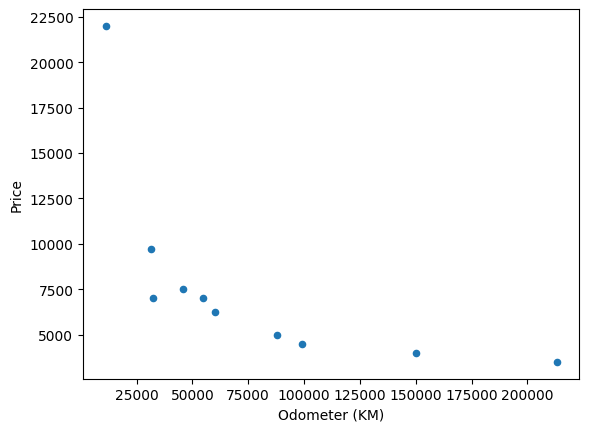

In [41]:
# Import Matplotlib and create a plot of the Odometer column
# Don't forget to use %matplotlib inline
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

<Axes: ylabel='Frequency'>

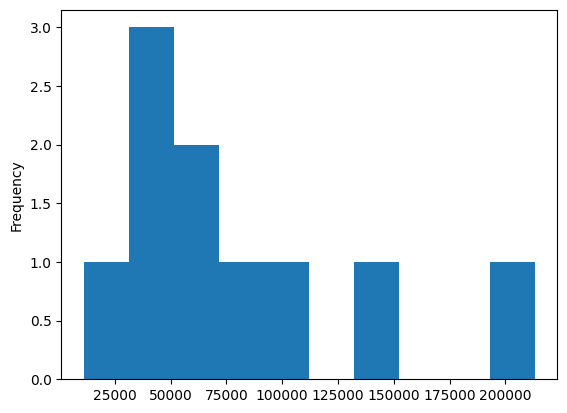

In [42]:
# Create a histogram of the Odometer column using hist()
car_sales["Odometer (KM)"].plot.hist()

<Axes: >

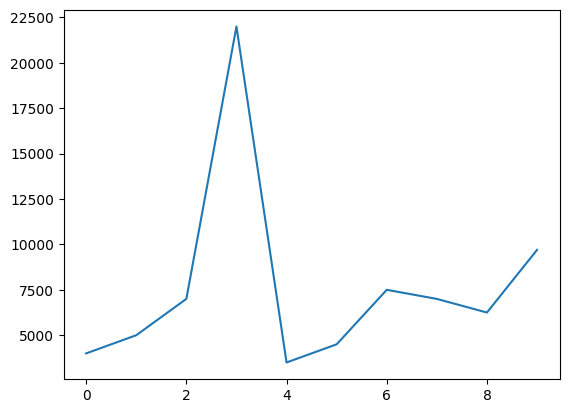

In [43]:
# Try to plot the Price column using plot()
car_sales["Price"].plot()

Why didn't it work? Can you think of a solution?

You might want to search for "how to convert a pandas string column to numbers".

And if you're still stuck, check out this [Stack Overflow question and answer on turning a price column into integers](https://stackoverflow.com/questions/44469313/price-column-object-to-int-in-pandas).

See how you can provide the example code there to the problem here.

In [28]:
# Remove the punctuation from price column


In [29]:
# Check the changes to the price column


In [30]:
# Remove the two extra zeros at the end of the price column


In [31]:
# Check the changes to the Price column


In [32]:
# Change the datatype of the Price column to integers


In [33]:
# Lower the strings of the Make column


If you check the car sales DataFrame, you'll notice the Make column hasn't been lowered.

How could you make these changes permanent?

Try it out.

In [45]:
# Make lowering the case of the Make column permanent
car_sales["Make"] = car_sales["Make"].str.lower()

In [46]:
# Check the car sales DataFrame
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,White,150043,4,4000.0
1,honda,Red,87899,4,5000.0
2,toyota,Blue,32549,3,7000.0
3,bmw,Black,11179,5,22000.0
4,nissan,White,213095,4,3500.0
5,toyota,Green,99213,4,4500.0
6,honda,Blue,45698,4,7500.0
7,honda,Blue,54738,4,7000.0
8,toyota,White,60000,4,6250.0
9,nissan,White,31600,4,9700.0


Notice how the Make column stays lowered after reassigning.

Now let's deal with missing data.

In [47]:
# Import the car sales DataFrame with missing data ("../data/car-sales-missing-data.csv")
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")

# Check out the new DataFrame
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


Notice the missing values are represented as `NaN` in pandas DataFrames.

Let's try fill them.

In [49]:
# Fill the Odometer column missing values with the mean of the column inplace
car_sales_missing["Odometer"] = car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean())

In [50]:
# View the car sales missing DataFrame and verify the changes
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [55]:
# Remove the rest of the missing data inplace
car_sales_missing.dropna(inplace=True)

In [56]:
# Verify the missing values are removed by viewing the DataFrame
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


We'll now start to add columns to our DataFrame.

In [57]:
# Create a "Seats" column where every row has a value of 5
car_sales["Seats"] = 5
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,4000.0,5
1,honda,Red,87899,4,5000.0,5
2,toyota,Blue,32549,3,7000.0,5
3,bmw,Black,11179,5,22000.0,5
4,nissan,White,213095,4,3500.0,5
5,toyota,Green,99213,4,4500.0,5
6,honda,Blue,45698,4,7500.0,5
7,honda,Blue,54738,4,7000.0,5
8,toyota,White,60000,4,6250.0,5
9,nissan,White,31600,4,9700.0,5


In [60]:
# Create a column called "Engine Size" with random values between 1.3 and 4.5
# Remember: If you're doing it from a Python list, the list has to be the same length
# as the DataFrame
import numpy as np

car_sales['Engine Size'] = np.random.uniform(1.3, 4.5, size=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Engine Size
0,toyota,White,150043,4,4000.0,5,3.499084
1,honda,Red,87899,4,5000.0,5,2.665777
2,toyota,Blue,32549,3,7000.0,5,2.907749
3,bmw,Black,11179,5,22000.0,5,3.020364
4,nissan,White,213095,4,3500.0,5,3.799838
5,toyota,Green,99213,4,4500.0,5,4.101618
6,honda,Blue,45698,4,7500.0,5,1.711249
7,honda,Blue,54738,4,7000.0,5,3.265838
8,toyota,White,60000,4,6250.0,5,1.685379
9,nissan,White,31600,4,9700.0,5,4.123882


In [61]:
# Create a column which represents the price of a car per kilometer
# Then view the DataFrame
car_sales["Price/km"] = car_sales["Price"] / car_sales["Odometer (KM)"]

In [44]:
# Remove the last column you added using .drop()

In [45]:
# Shuffle the DataFrame using sample() with the frac parameter set to 1
# Save the the shuffled DataFrame to a new variable

Notice how the index numbers get moved around. The [`sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) function is a great way to get random samples from your DataFrame. It's also another great way to shuffle the rows by setting `frac=1`.

In [46]:
# Reset the indexes of the shuffled DataFrame


Notice the index numbers have been changed to have order (start from 0).

In [47]:
# Change the Odometer values from kilometers to miles using a Lambda function
# Then view the DataFrame


In [48]:
# Change the title of the Odometer (KM) to represent miles instead of kilometers


## Extensions

For more exercises, check out the pandas documentation, particularly the [10-minutes to pandas section](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html). 

One great exercise would be to retype out the entire section into a Jupyter Notebook of your own.

Get hands-on with the code and see what it does.

The next place you should check out are the [top questions and answers on Stack Overflow for pandas](https://stackoverflow.com/questions/tagged/pandas?sort=MostVotes&edited=true). Often, these contain some of the most useful and common pandas functions. Be sure to play around with the different filters!

Finally, always remember, the best way to learn something new to is try it. Make mistakes. Ask questions, get things wrong, take note of the things you do most often. And don't worry if you keep making the same mistake, pandas has many ways to do the same thing and is a big library. So it'll likely take a while before you get the hang of it.